In [1]:
import pandas as pd
house = pd.read_csv("Kolkata.csv")
house.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,2235000,1016,Barasat,3,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,3665999,1111,Keshtopur,2,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3774000,1020,Rajarhat,2,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2524000,935,Narendrapur,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,8300000,1956,New Town,3,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0


array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'No. of Bedrooms'}>,
        <AxesSubplot:title={'center':'Resale'}>,
        <AxesSubplot:title={'center':'MaintenanceStaff'}>,
        <AxesSubplot:title={'center':'Gymnasium'}>],
       [<AxesSubplot:title={'center':'SwimmingPool'}>,
        <AxesSubplot:title={'center':'LandscapedGardens'}>,
        <AxesSubplot:title={'center':'JoggingTrack'}>,
        <AxesSubplot:title={'center':'RainWaterHarvesting'}>,
        <AxesSubplot:title={'center':'IndoorGames'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Intercom'}>,
        <AxesSubplot:title={'center':'SportsFacility'}>,
        <AxesSubplot:title={'center':'ATM'}>,
        <AxesSubplot:title={'center':'ClubHouse'}>,
        <AxesSubplot:title={'center':'School'}>,
        <AxesSubplot:title={'center':'24X7Security'}>],
       [<AxesSubplot:title={'cent

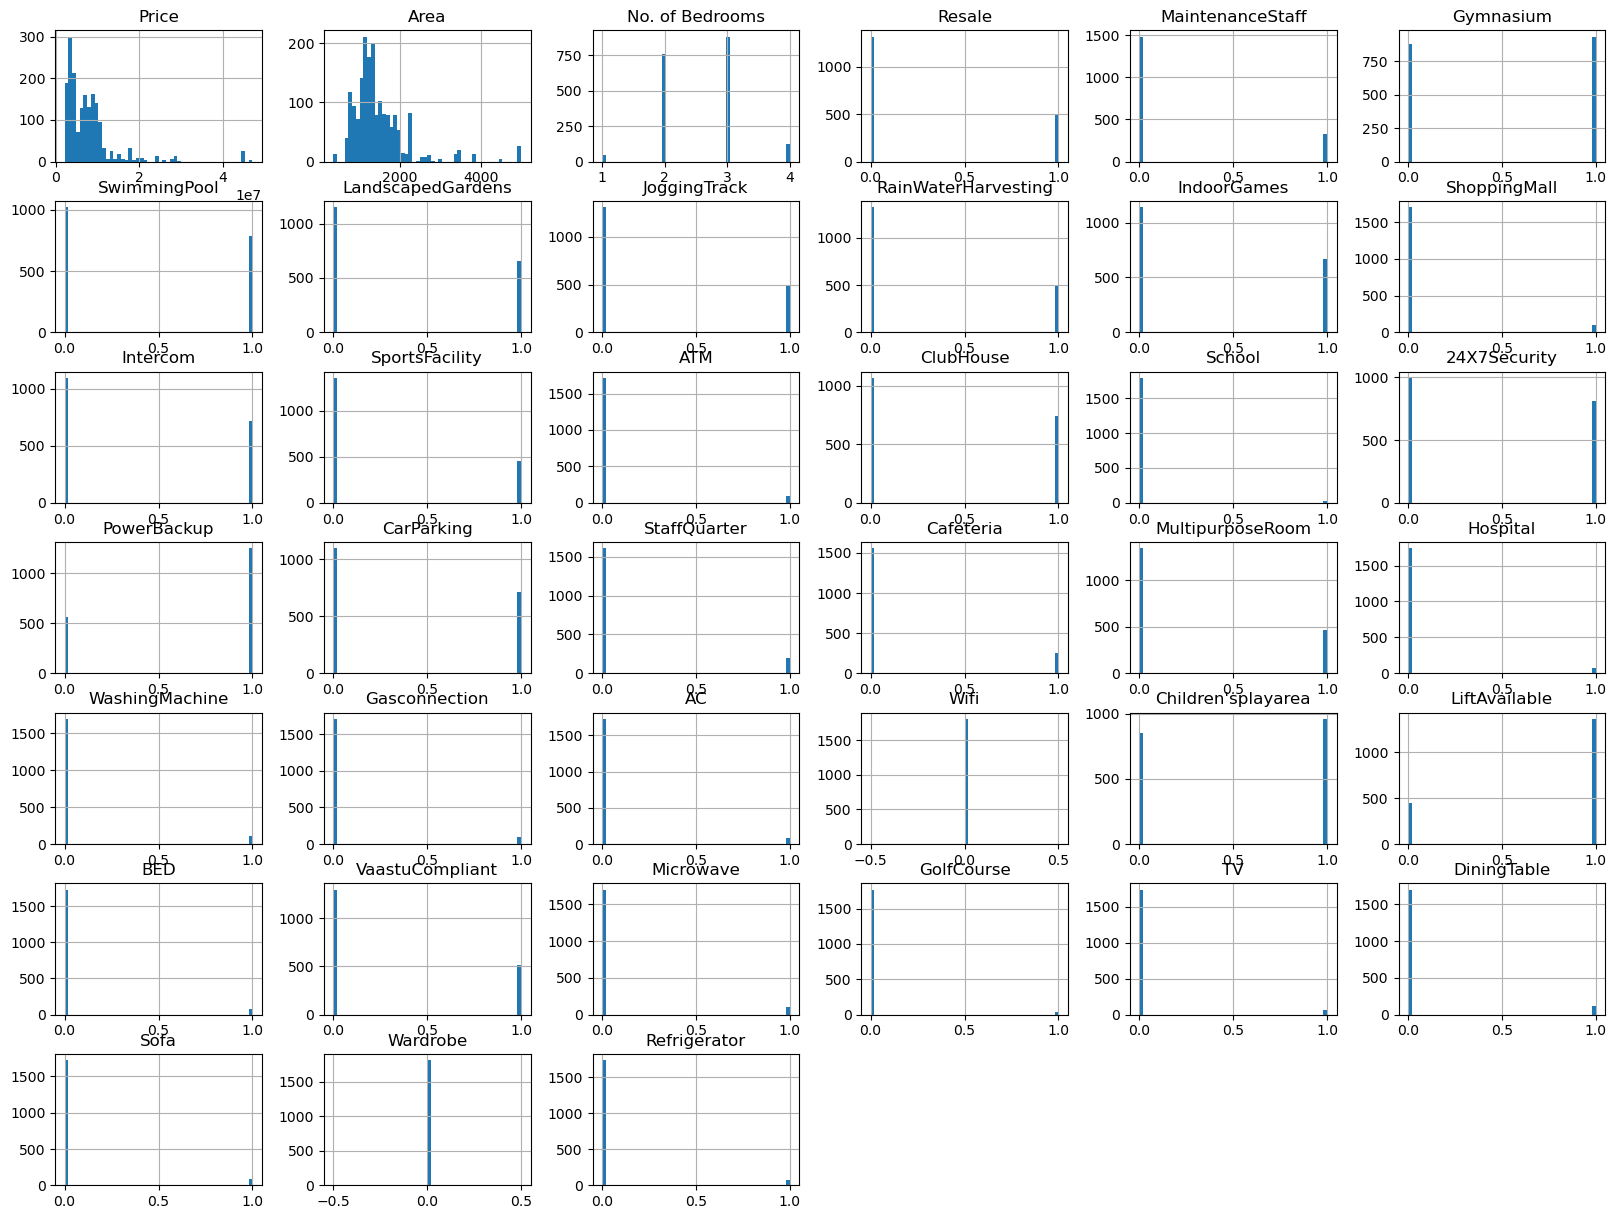

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
house.hist(bins = 50 , figsize = (20 , 15))

In [3]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(house , test_size = 0.3 , random_state = 42)
print("Rows in test : " , len(test_set) , "\nRows in training set : " , len(train_set))

Rows in test :  543 
Rows in training set :  1266


In [4]:
corr_mat = house.corr()
corr_mat['Price'].sort_values(ascending = False)

Price                  1.000000
Area                   0.930799
No. of Bedrooms        0.605829
TV                     0.432504
DiningTable            0.396729
Gasconnection          0.391273
Microwave              0.387621
Refrigerator           0.359188
AC                     0.357870
BED                    0.349886
Sofa                   0.338170
StaffQuarter           0.331740
SwimmingPool           0.326020
WashingMachine         0.325207
ClubHouse              0.310017
Gymnasium              0.249467
MultipurposeRoom       0.245874
Children'splayarea     0.242926
ATM                    0.225618
Resale                 0.220095
SportsFacility         0.215269
RainWaterHarvesting    0.205223
VaastuCompliant        0.199677
JoggingTrack           0.193372
Intercom               0.169998
PowerBackup            0.133880
LiftAvailable          0.115755
IndoorGames            0.107563
CarParking             0.082441
Cafeteria              0.071256
ShoppingMall           0.060806
Landscap

array([[<AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Area', ylabel='Price'>,
        <AxesSubplot:xlabel='No. of Bedrooms', ylabel='Price'>,
        <AxesSubplot:xlabel='Resale', ylabel='Price'>],
       [<AxesSubplot:xlabel='Price', ylabel='Area'>,
        <AxesSubplot:xlabel='Area', ylabel='Area'>,
        <AxesSubplot:xlabel='No. of Bedrooms', ylabel='Area'>,
        <AxesSubplot:xlabel='Resale', ylabel='Area'>],
       [<AxesSubplot:xlabel='Price', ylabel='No. of Bedrooms'>,
        <AxesSubplot:xlabel='Area', ylabel='No. of Bedrooms'>,
        <AxesSubplot:xlabel='No. of Bedrooms', ylabel='No. of Bedrooms'>,
        <AxesSubplot:xlabel='Resale', ylabel='No. of Bedrooms'>],
       [<AxesSubplot:xlabel='Price', ylabel='Resale'>,
        <AxesSubplot:xlabel='Area', ylabel='Resale'>,
        <AxesSubplot:xlabel='No. of Bedrooms', ylabel='Resale'>,
        <AxesSubplot:xlabel='Resale', ylabel='Resale'>]], dtype=object)

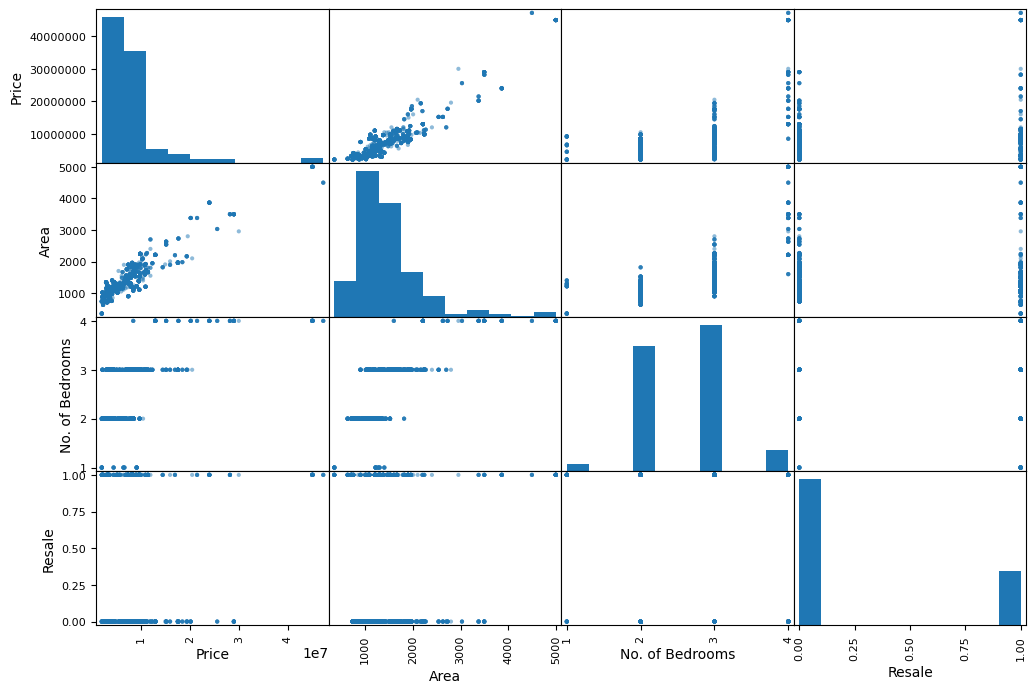

In [5]:
from pandas.plotting import scatter_matrix
attr = ["Price" , "Area" , "No. of Bedrooms" , "Resale"]
scatter_matrix(house[attr] , figsize = (12 , 8))

In [6]:
newDF = house[["Area" , "No. of Bedrooms", "PowerBackup"  , "Gasconnection" ,"AC" , "Location" , "Price"]]
newDF.shape

(1809, 7)

<AxesSubplot:>

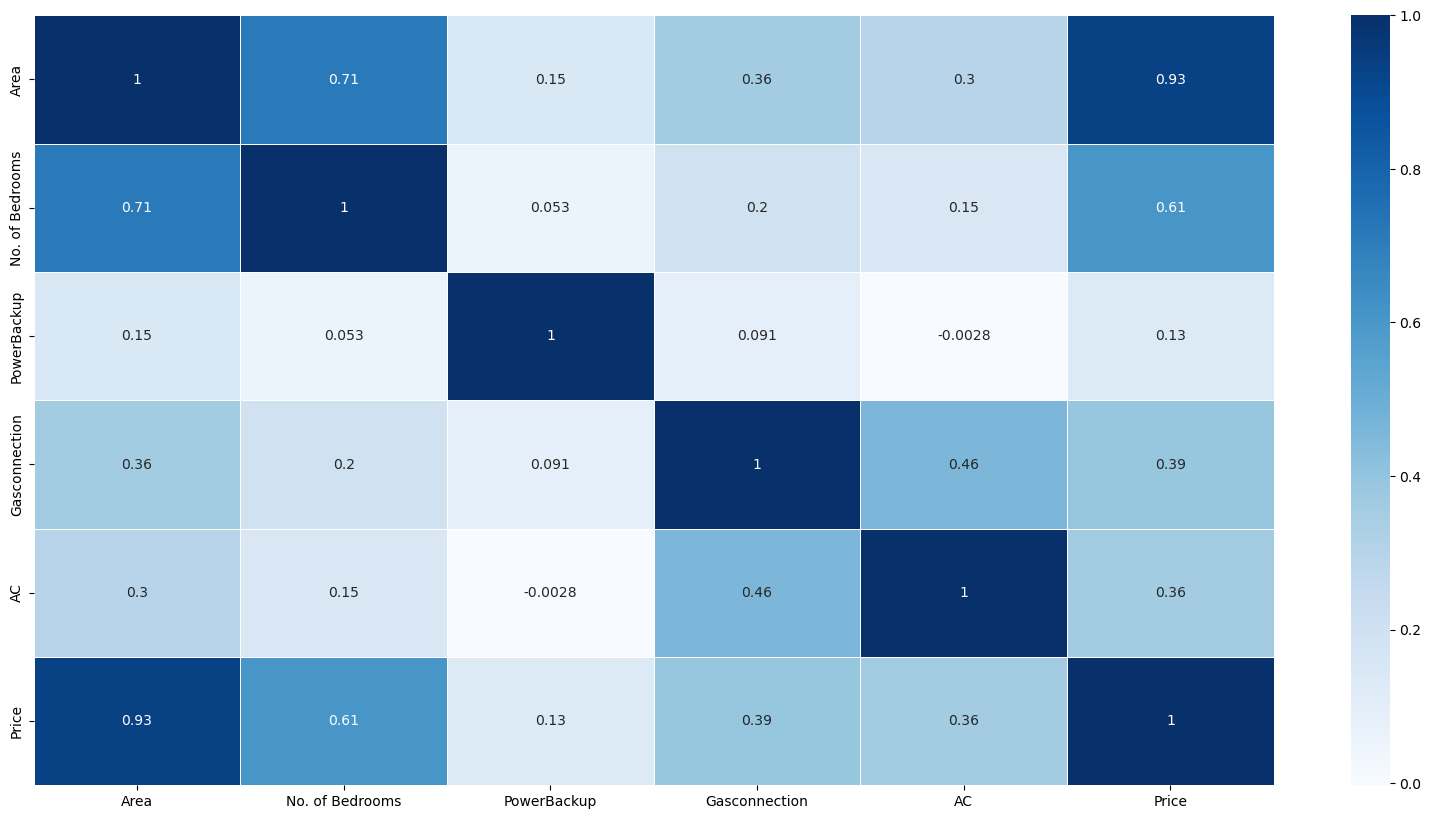

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(20,10))
fig = sns.heatmap(newDF.corr(), cmap='Blues' , annot = True , linewidths=0.5)
fig

In [8]:
y = newDF.Price
x = newDF.drop(["Location" , 'Price'],axis='columns')
x.head(2)

,Area,No. of Bedrooms,PowerBackup,Gasconnection,AC
0,1016,3,1,0,0
1,1111,2,1,0,0


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [10]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.87898506623045

In [11]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.87898507, 0.85143115, 0.88832378, 0.85590758, 0.91186768])

In [12]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

m

,model,best_score,best_params
0,linear_regression,0.887486,{'normalize': True}


In [13]:
import pickle
with open('Mumbai_home_prices_model.pkl','wb') as f:
    pickle.dump(lr_clf,f)